In [3]:
# Usual suspect
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys
import functools
import math
from fastprogress import progress_bar
from typing import List
import os
sys.path.insert(1, '/home/geant/Desktop/Muograph/muograph')

<h1><center>TUTORIAL: Neighborhood sum</center></h1>

Data file:

 - The **VOI** at study is a $80\times20\times10 \: \text{cm}^{3}$ statue containing a cyclinder of water. 

 - **Data file**: `/home/geant/Desktop/Muograph_analysis/data/MuoscopeStatue_4Scale_1-2-2016_5M_Bronze_Scattering/G4_data`
 
 - **Generated muons**: 5M
 
 - **CRY generation surface**: $1\times1 \text  {m}^2$
 
 - **Acquisition time**: $\approx 8\text{h}20\text{min}$ at sea level, assuming perfect detector efficiency.

In [4]:
input_dir = "/home/geant/Desktop/Muograph_analysis/data/MuoscopeStatue_4Scale_1-2-2016_5M_Bronze_Scattering/G4_data/"
output_dir = "/home/geant/Desktop/Muograph_analysis/data/MuoscopeStatue_4Scale_1-2-2016_5M_Bronze_Scattering/0_mm_resolution/"

In [5]:
from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,835],dimension=[400,1000,300],voxel_width=20)

from analysis.analysis import analysis
my_analysis = analysis(VOI=VOI,
                       compute_tracks=True,
                       n_event=None,
                       input_dir = input_dir,
                       output_dir = output_dir)


Tracking in progress


Tracking done
Scattering angles computation done


In [6]:
poca = my_analysis.load_pickle("poca_class")
poca

POCA points:
Total # event = 732913
# POCA dtheta > 0.01 deg = 313630
# POCA in VOI = 238192

In [7]:
from reconstruction.sum_from_the_hood import neighborhood_sum

_dir = "/home/geant/Desktop/Muograph_analysis/data/MuoscopeStatue_4Scale_1-2-2016_5M_Bronze_Scattering/0_mm_resolution/"

ns = neighborhood_sum(poca=poca, output_dir=_dir)

In [8]:
ns.set_up(epsilon=20, save=True)

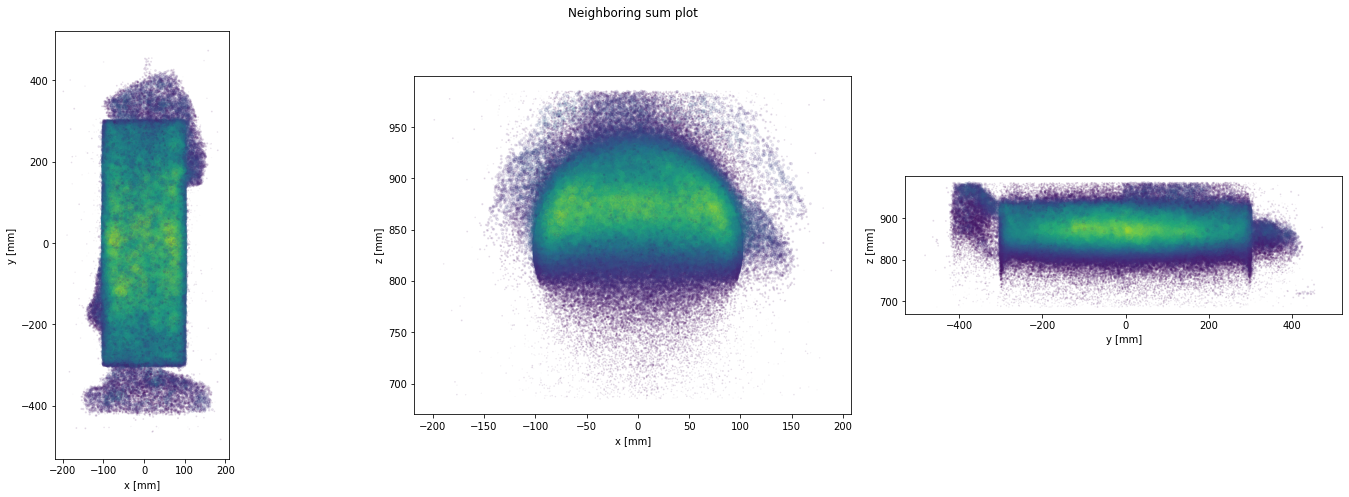

In [10]:
x,y,z = ns.x, ns.y, ns.z
# def plot_ns(ns,max_point_size=1.) -> None:

fig,axs = plt.subplots(figsize=(20,7),ncols=3)
fig.suptitle("Neighboring sum plot")

# plot ns
# XY view
axs[0].scatter(ns.x,ns.y,
              c=ns.normalized_ns,
              s=1*ns.normalized_ns,
              alpha=.1)
axs[0].set_xlabel("x [mm]")
axs[0].set_ylabel("y [mm]")

# XZ view
im = axs[1].scatter(ns.x,ns.z,
                   c=ns.normalized_ns,
                   s=ns.normalized_ns,
                   alpha=.1)

axs[1].set_xlabel("x [mm]")
axs[1].set_ylabel("z [mm]")

# YZ view
axs[2].scatter(ns.y,ns.z,
              c=ns.normalized_ns,
              s=ns.normalized_ns,
              alpha=.1)

axs[2].set_xlabel("y [mm]")
axs[2].set_ylabel("z [mm]")

for ax in axs:
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()
